In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [4]:
train_df=pd.read_csv('p/mitbih_train.csv', header=None)
test_df=pd.read_csv('p/mitbih_test.csv', header=None)

In [5]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [6]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [7]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)
from sklearn.utils import resample

SAMPLES = 5000
RANDOM_STATE = 42



187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


In [8]:
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import concatenate


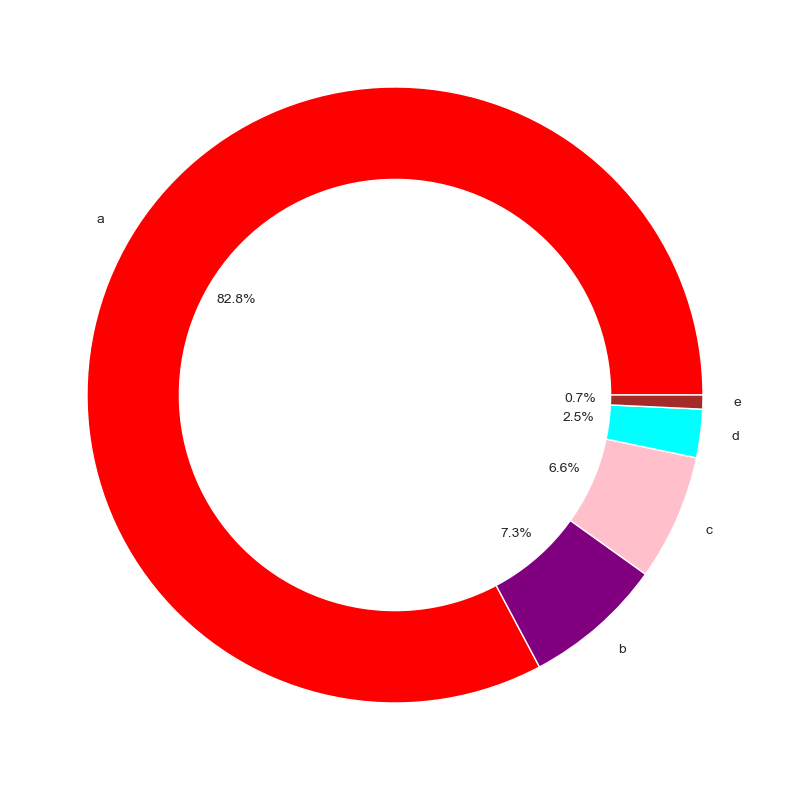

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(equilibre, labels=['a', 'b', 'c', 'd', 'e'], colors=['red', 'purple', 'pink', 'cyan', 'brown'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


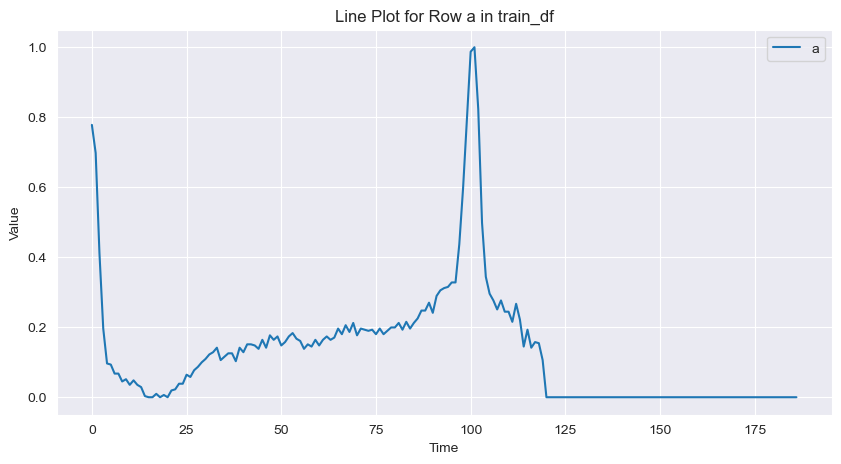

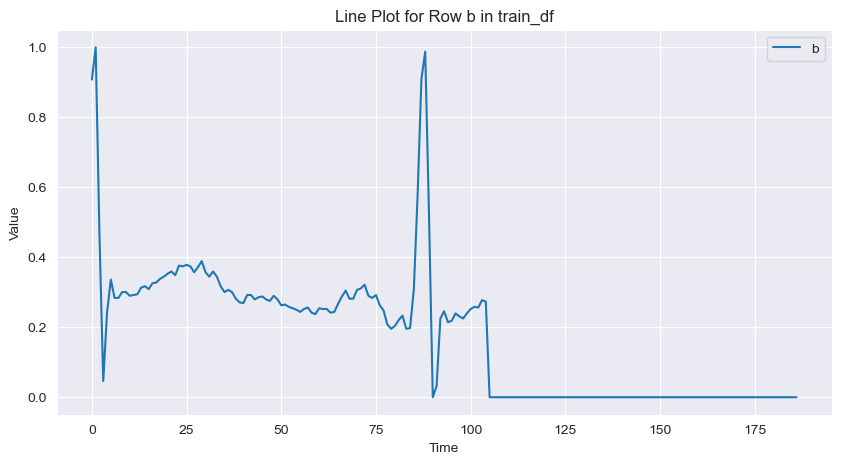

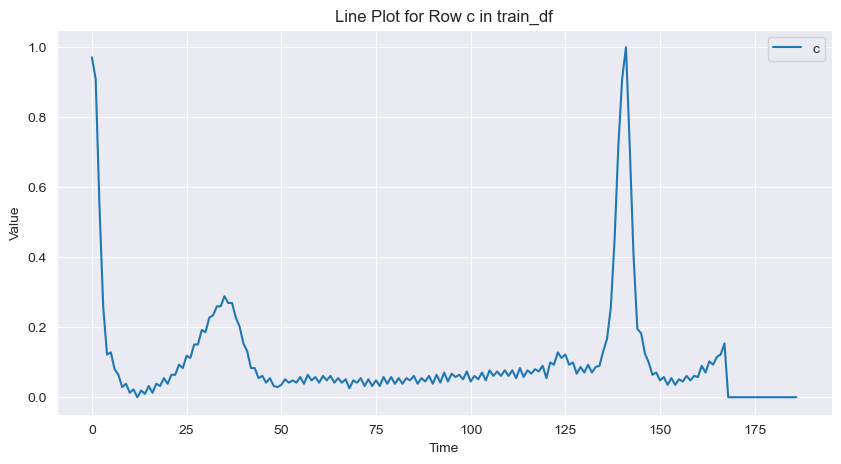

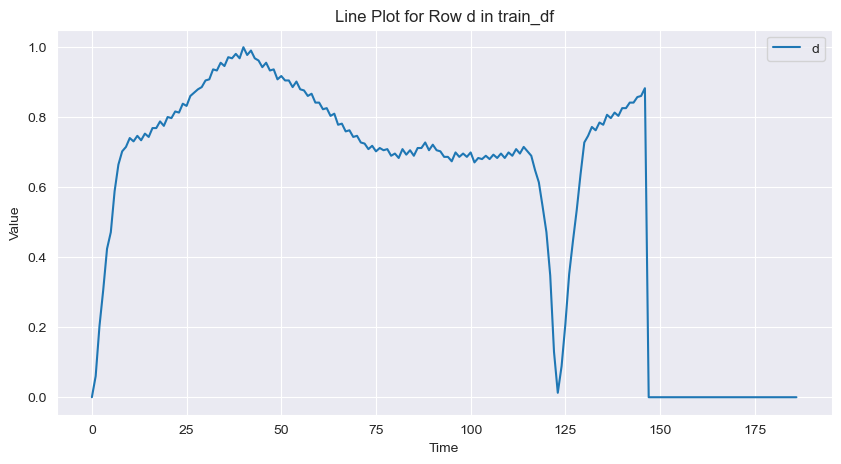

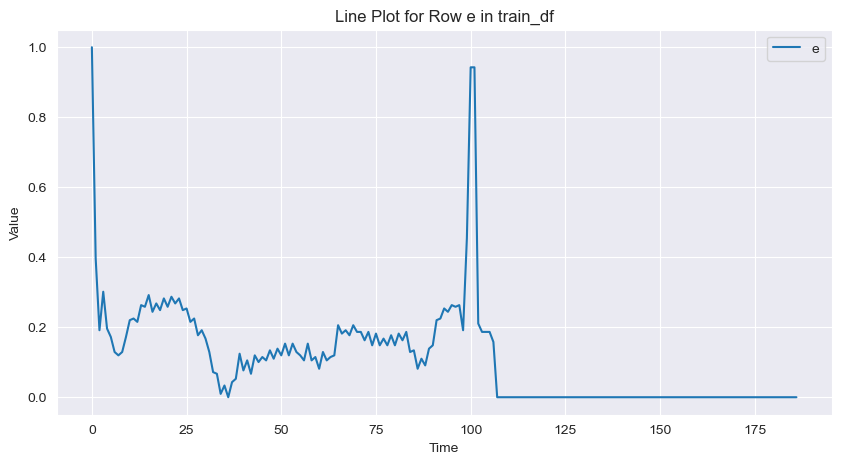

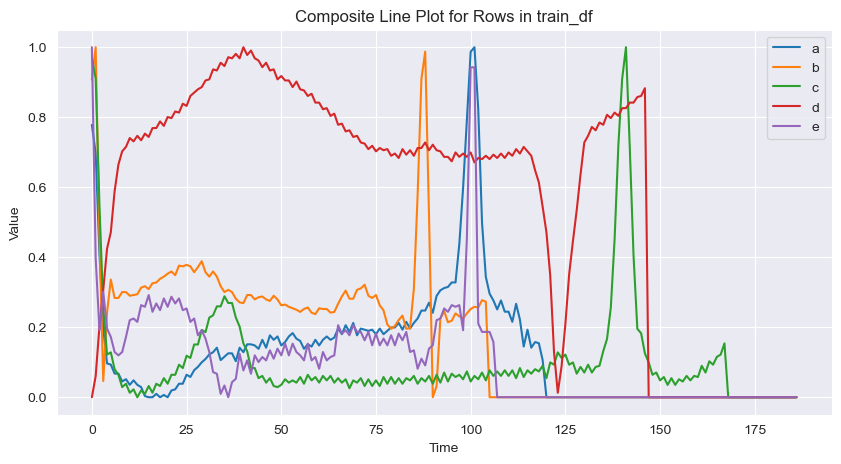

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
labels = ['a', 'b', 'c', 'd', 'e']
 
for i, v in enumerate(range(5)):
    plt.figure(figsize=(10, 5))
    plt.plot(train_df.iloc[v, 0:187], label=labels[i])
    
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Line Plot for Row {labels[i]} in train_df')
    plt.legend()
    plt.show()
# Plot composite graph with all lines
plt.figure(figsize=(10, 5))

for i, v in enumerate(range(5)):
    plt.plot(train_df.iloc[v, 0:187], label=labels[i])  # Use alpha to make lines semi-transparent

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Composite Line Plot for Rows in train_df')
plt.legend()
plt.show()


In [59]:
#CNN

In [21]:
X, y = train_df.iloc[: , :-1], train_df.iloc[: , -1]
X, valX, y, valy= train_test_split(X,y,test_size=0.2)
testX, testy = test_df.iloc[: , :-1], test_df.iloc[: , -1]
y = to_categorical(y)
testy = to_categorical(testy)
valy=to_categorical(valy)


In [22]:
print("X shape=" +str(X.shape))
print("y shape=" +str(y.shape))
print("valX shape=" +str(valX.shape))
print("valy shape=" +str(valy.shape))
print("testX shape=" +str(testX.shape))
print("testy shape=" +str(testy.shape))

X shape=(20000, 187)
y shape=(20000, 5)
valX shape=(5000, 187)
valy shape=(5000, 5)
testX shape=(21892, 187)
testy shape=(21892, 5)


In [23]:
model = Sequential()

# Input layer
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(187, 1)))
model.add(MaxPooling1D(pool_size=2))

# Additional convolutional and pooling layers
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(5, activation='softmax'))

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 185, 32)           128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 92, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 90, 64)            6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 45, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2880)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [26]:
model_history = model.fit(X, y,validation_data=(valX, valy),epochs=15)

Epoch 1/15
625/625 [==============================] - 6s 8ms/step - loss: 0.6065 - accuracy: 0.7739 - val_loss: 0.3937 - val_accuracy: 0.8560
Epoch 2/15
625/625 [==============================] - 5s 8ms/step - loss: 0.3098 - accuracy: 0.8863 - val_loss: 0.2946 - val_accuracy: 0.8884
Epoch 3/15
625/625 [==============================] - 6s 9ms/step - loss: 0.2246 - accuracy: 0.9168 - val_loss: 0.2284 - val_accuracy: 0.9126
Epoch 4/15
625/625 [==============================] - 6s 9ms/step - loss: 0.1735 - accuracy: 0.9369 - val_loss: 0.2390 - val_accuracy: 0.9106
Epoch 5/15
625/625 [==============================] - 5s 8ms/step - loss: 0.1435 - accuracy: 0.9477 - val_loss: 0.1783 - val_accuracy: 0.9308
Epoch 6/15
625/625 [==============================] - 5s 9ms/step - loss: 0.1159 - accuracy: 0.9590 - val_loss: 0.1518 - val_accuracy: 0.9456
Epoch 7/15
625/625 [==============================] - 5s 8ms/step - loss: 0.1004 - accuracy: 0.9651 - val_loss: 0.1414 - val_accuracy: 0.9536
Epoch 

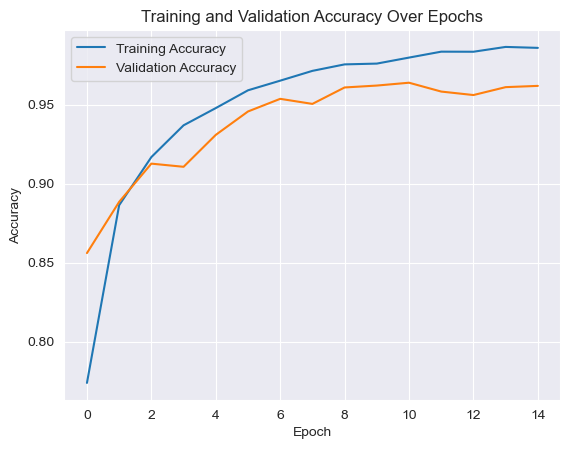

In [27]:

# Assuming different_model_history is the history object from your model training
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [42]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_train_pred = mlp_model.predict(X_train)
mlp_test_pred = mlp_model.predict(X_test)
mlp_train_accuracy = accuracy_score(y_train, mlp_train_pred)
mlp_test_accuracy = accuracy_score(y_test, mlp_test_pred)

print("\nMLP Classifier:")
print("Training Accuracy:", mlp_train_accuracy)
print("Testing Accuracy:", mlp_test_accuracy)

C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):



MLP Classifier:
Training Accuracy: 0.9958125
Testing Accuracy: 0.94875


C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

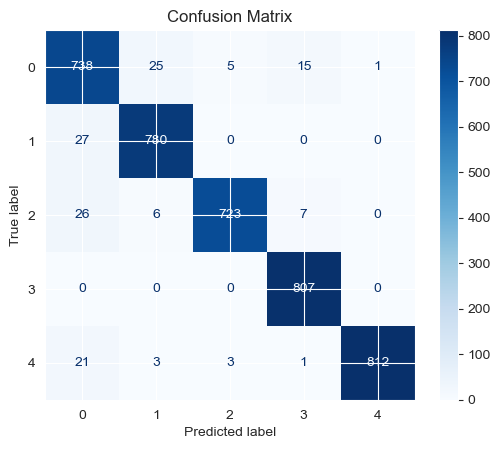

[[738  25   5  15   1]
 [ 27 780   0   0   0]
 [ 26   6 723   7   0]
 [  0   0   0 807   0]
 [ 21   3   3   1 812]]


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_single = np.argmax(y_test, axis=1)

mlp_test_pred_single = np.argmax(mlp_test_pred, axis=1)

cm = confusion_matrix(y_test_single, mlp_test_pred_single)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()
print(cm)

In [44]:
report = classification_report(y_test_single, mlp_test_pred_single)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       784
           1       0.96      0.97      0.96       807
           2       0.99      0.95      0.97       762
           3       0.97      1.00      0.99       807
           4       1.00      0.97      0.98       840

    accuracy                           0.96      4000
   macro avg       0.97      0.96      0.96      4000
weighted avg       0.97      0.96      0.97      4000



# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestClassifier(random_state=42)

In [54]:
y_pred = rf_model.predict(X_test)


C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [56]:

y_train_pred = rf_model.predict(X_train)

rn_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'rn Accuracy: {train_accuracy:.2f}')
ran_accuracy = accuracy_score(y_test, y_pred)
print(f'test Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)


C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


rn Accuracy: 1.00
test Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       784
           1       0.99      0.96      0.98       807
           2       1.00      0.94      0.97       762
           3       0.99      1.00      0.99       807
           4       1.00      0.97      0.99       840

   micro avg       0.99      0.96      0.97      4000
   macro avg       0.99      0.96      0.97      4000
weighted avg       0.99      0.96      0.97      4000
 samples avg       0.96      0.96      0.96      4000



C:\ProgramData\anaconda3\envs\dh\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


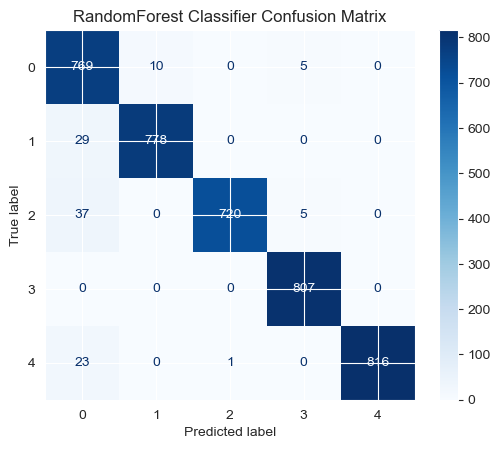

In [57]:
y_test_single = np.argmax(y_test, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_single, y_pred_single)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('RandomForest Classifier Confusion Matrix')
plt.show()

In [62]:
models = ['CNN', 'MLP Classifier', 'Random Forest']
train_accuracies = [max(model_history.history['accuracy']), mlp_train_accuracy, rn_train_accuracy]
test_accuracies = [max(model_history.history['val_accuracy']), mlp_test_accuracy, ran_accuracy]
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, train_accuracies, bar_width, label='Training Accuracy')
plt.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy')

# Add labels and title to the plot
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(index + bar_width / 2, models)
plt.legend()

# Display the plot
plt.show()


OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)